# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv("megaline_calls.csv",sep=',')
internet= pd.read_csv("megaline_internet.csv",sep=',')
messages = pd.read_csv("megaline_messages.csv",sep=',')
plans = pd.read_csv("megaline_plans.csv",sep=',')
users = pd.read_csv("megaline_users.csv",sep=',')


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* Lo que observo es que los tipos de datos para las columnas correspondientes al costo por gb y pago mensual son de tipo entero, yo los cambiaría a flotante, ya que muy probablemente se requieran realizar operaciones matemáticas con ellas, y necesitamos la exactitud que nos proporciona tener decimales.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float)
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 260.0+ bytes


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [7]:
# Imprime una muestra de datos para usuarios

print(users.sample(10))

     user_id first_name  last_name  age  \
261     1261      Dusti     Forbes   31   
146     1146       Loma     Mcneil   42   
424     1424   Kasandra      Keith   51   
45      1045     Barney     Ortega   20   
315     1315       Mora  Schroeder   45   
446     1446   Pasquale       Ball   52   
487     1487      Elton    Simpson   18   
434     1434        Kai       Barr   18   
460     1460    Winford  Underwood   46   
3       1003   Reynaldo    Jenkins   52   

                                               city    reg_date      plan  \
261                          Kansas City, MO-KS MSA  2018-02-22      surf   
146       New York-Newark-Jersey City, NY-NJ-PA MSA  2018-10-13      surf   
424  Virginia Beach-Norfolk-Newport News, VA-NC MSA  2018-07-24  ultimate   
45        New York-Newark-Jersey City, NY-NJ-PA MSA  2018-10-15      surf   
315                            Raleigh-Cary, NC MSA  2018-04-26      surf   
446            Austin-Round Rock-Georgetown, TX MSA  2018-09-10 

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* Se observa que los datos de la columna reg_date son de tipo object, por lo que la sugerencia es cambiar el tipo de dato a datetime64 con la funcion de pandas to_datetime, ya que esto nos permitirá obtener datos de dia, mes y año de la fecha correctamente e incluso hacer algunos calculos con fechas.

* De igual manera se encuentra la columna churn_date que se refiere la fecha en que el suscriptor dejo el plan, con valores ausentes, en la info previa se describe ese valor nulo como incluso información ya que si el valor es nulo entonces significa que su plan esta activo. Lo que sugiero hacer es enriquecer el dataframe con una columna que nos diga si el cliente esta activo o no. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Prepararé aquí los dataframes necesarios para la ultima prueba de hipotesis que solicita separar los datos de los ususarios de NY-NJ del resto

In [9]:
#Separar los datos para los que son usuarios de NY-NJ del resto de los usuarios
# Filtramos con .contains los datos para separar los usuarios de NY-NJ y el resto de los usuarios del dataframe users
data_ny_nj = users[users['city'].str.contains('NY-NJ')]
# Filtramos los datos para separar el resto de los usuarios
data_other = users[~users['city'].str.contains('NY-NJ')]

data_ny_nj

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaN
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaN
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN
...,...,...,...,...,...,...,...,...
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,NaN
482,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaN
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [11]:
# Imprime una muestra de datos para las llamadas
print(calls.sample(15))


               id  user_id   call_date  duration
125094   1440_610     1440  2018-07-19     13.04
133066   1480_364     1480  2018-12-22     13.79
79534   1284_1072     1284  2018-12-08      1.72
51373    1185_411     1185  2018-05-20      0.00
98062    1352_339     1352  2018-10-09      0.00
50982     1185_20     1185  2018-02-17      1.28
29051    1110_102     1110  2018-12-28      0.00
23942    1090_116     1090  2018-05-23      8.79
63818     1232_42     1232  2018-05-06      9.12
86286    1318_175     1318  2018-12-26      0.00
20955    1077_922     1077  2018-04-17      8.91
79200     1284_60     1284  2018-12-15      2.87
9418     1042_349     1042  2018-08-25      0.00
20663    1077_630     1077  2018-11-05      8.87
128551   1461_195     1461  2018-11-18      9.23


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* La columna call_date que se refiere a la fecha de la llamada tiene el tipo de dato object, por lo sugerible es cambiar el tipo de dato a datetime64 con la función de pandas to_datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
calls.info()
print(calls.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
              id  user_id  call_date  duration
133593  1483_444     1483 2018-09-20      5.88
11421   1050_193     1050 2018-09-17      0.00
133503  1483_334     1483 2018-10-14      5.45
44568   1160_584     1160 2018-07-05      4.97
26707    1101_34     1101 2018-12-27      0.00
12934    1056_77     1056 2018-09-09      1.64
137519  1498_456     1498 2018-02-13      4.86
82903   1299_561     1299 2018-06-22      0.00
55785   1199_500     1199 2018-10-06      7.92
35370   1132_840     1132 2018-12-05      0.00


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes

messages.sample(10)

,id,user_id,message_date
45237,1304_47,1304,2018-11-22
62667,1394_56,1394,2018-12-12
74990,1489_65,1489,2018-12-30
10987,1077_258,1077,2018-03-02
32754,1203_399,1203,2018-07-06
51447,1335_36,1335,2018-12-24
67170,1435_208,1435,2018-11-19
30649,1193_311,1193,2018-11-01
59,1001_97,1001,2018-12-05
52960,1339_94,1339,2018-05-31


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* * La columna message_date que se refiere a la fecha del mensaje tiene el tipo de dato object, por lo sugerible es cambiar el tipo de dato a datetime64 con la función de pandas to_datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [16]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [17]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.sample(10))

             id  user_id session_date  mb_used
56500  1255_255     1255   2018-09-18   282.65
76446  1359_127     1359   2018-02-14     0.00
81776  1383_338     1383   2018-10-14   341.28
61061  1277_364     1277   2018-06-03   270.83
72129  1336_151     1336   2018-08-24   251.15
84376  1392_344     1392   2018-11-18   441.19
95842   1447_32     1447   2018-12-02   829.41
73527  1346_108     1346   2018-04-28   237.06
18298  1081_376     1081   2018-12-22     0.00
78661  1367_189     1367   2018-10-12    56.75


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

* Se observa que el tipo de datos para columna session_date es de tipo object, por lo que se sugiere cambiar el tipo de variable a datetime64.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [19]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans.info())
print(plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 260.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0             20.0        10.0      

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [20]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

#Agrupar en una nueva columna los datos por mes que no tome en cuenta el día
calls['month'] = calls['call_date'].dt.to_period('M')

#Agrupar por usuario y mes, cuenta las llamadas (use la columna id de llamada para contarlas)
calls_per_user_month = (calls.groupby(['user_id','month'])
                        .agg(num_calls=('id','count'))
                        .reset_index()
                        )

calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018-11
137731,1499_200,1499,2018-10-20,10.89,2018-10
137732,1499_201,1499,2018-09-21,8.12,2018-09
137733,1499_202,1499,2018-10-10,0.37,2018-10


In [21]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

#Agrupar por usuario y mes, creando una nueva columna donde poner la suma de la columna duration
#Redondear al entero siguiente más alto los minutos tal y como se especifica en las condiciones de los cobros de las tarifas
calls['charged_minutes_per_call'] = np.ceil(calls['duration']) #Para hacer ese redondeo hacia "arriba" utilice la fuincion ceil de numpy
charged_calls = (
    calls
    .groupby(['user_id', 'month'])[['duration','charged_minutes_per_call']]
    .sum()
    .reset_index()
    .rename(columns={'duration':'original_total_minutes','charged_minutes_per_call': 'charged_minutes'})
)

charged_calls

,user_id,month,original_total_minutes,charged_minutes
0,1000,2018-12,116.83,124.0
1,1001,2018-08,171.14,182.0
2,1001,2018-09,297.69,315.0
3,1001,2018-10,374.11,393.0
4,1001,2018-11,404.59,426.0
...,...,...,...,...
2253,1498,2018-12,324.77,339.0
2254,1499,2018-09,330.37,346.0
2255,1499,2018-10,363.28,385.0
2256,1499,2018-11,288.56,308.0


In [22]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

#Agrupar en una nueva columna los datos por mes que no tome en cuenta el día
messages['month'] = messages['message_date'].dt.to_period('M')

#Agrupar los datos por user y month, y en una nueva columna colocar la count de la columna id
messages_per_month = (messages.groupby(['user_id','month'])
                      .agg(numb_messages=('id','count'))
                      .reset_index()
                      )

messages_per_month


,user_id,month,numb_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [23]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

#Agrupar datos por mes en una nueva columna que no tome en cuenta el día
internet['month'] = internet['session_date'].dt.to_period('M')

#Agrupar los datos por user y month, y añadir una nueva columna para la suma de mb_used
internet_traffic_per_user_month = (internet.groupby(['user_id','month'])
                                   .agg(mb_used_per_month=('mb_used','sum'))
                                   .reset_index()
                                   )

internet_traffic_per_user_month

,user_id,month,mb_used_per_month
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [24]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#Fusionamos los primeros dos dataframe con el how=left.
df_merge_1 = pd.merge(calls_per_user_month,charged_calls, on=(['user_id','month']), how='left')

#Fusionamos el df_merge_1 con el siguiente dataframe
df_merge_2 = pd.merge(df_merge_1,messages_per_month,how='left',on=(['user_id','month']))

#Fusionamos el df_merge_2 con el siguiente dataframe y este será el df final que usaremos
data_per_user_month_general = pd.merge(df_merge_2,internet_traffic_per_user_month,how='left',on=(['user_id','month']))

# Rellenamos los huecos que se crearian al momento de hacer merge de los diferentes dataframes por 0
data_per_user_month_general = data_per_user_month_general.fillna(0)

data_per_user_month_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype    
---  ------                  --------------  -----    
 0   user_id                 2258 non-null   int64    
 1   month                   2258 non-null   period[M]
 2   num_calls               2258 non-null   int64    
 3   original_total_minutes  2258 non-null   float64  
 4   charged_minutes         2258 non-null   float64  
 5   numb_messages           2258 non-null   float64  
 6   mb_used_per_month       2258 non-null   float64  
dtypes: float64(4), int64(2), period[M](1)
memory usage: 123.6 KB


In [25]:
# Añade la información de la tarifa
# Crea un dataframe nuevo que solo contenga el plan para cada usuario. 
# Usar drop_duplicates asegura que user_id aparezca solo una vez
users_plans = users[['user_id','plan']].drop_duplicates()
# Unir los dos dataframes haciendo coinicidr el user_id
data_per_user_month_general = data_per_user_month_general.merge(users_plans,on='user_id',how='left')

data_per_user_month_general

,user_id,month,num_calls,original_total_minutes,charged_minutes,numb_messages,mb_used_per_month,plan
0,1000,2018-12,16,116.83,124.0,11.0,1901.47,ultimate
1,1001,2018-08,27,171.14,182.0,30.0,6919.15,surf
2,1001,2018-09,49,297.69,315.0,44.0,13314.82,surf
3,1001,2018-10,65,374.11,393.0,53.0,22330.49,surf
4,1001,2018-11,64,404.59,426.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...,...
2253,1498,2018-12,39,324.77,339.0,0.0,23137.69,surf
2254,1499,2018-09,41,330.37,346.0,0.0,12984.76,surf
2255,1499,2018-10,53,363.28,385.0,0.0,19492.43,surf
2256,1499,2018-11,45,288.56,308.0,0.0,16813.83,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [26]:
# para facilitar el código haré df como el dataframe al cual añadiré los datos necesarios para los cálculos
# Le incluiré la información completa de los planes 
df = data_per_user_month_general.merge(plans,
              left_on='plan',
              right_on='plan_name',
              how='left'
              )

df


,user_id,month,num_calls,original_total_minutes,charged_minutes,numb_messages,mb_used_per_month,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16,116.83,124.0,11.0,1901.47,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate
1,1001,2018-08,27,171.14,182.0,30.0,6919.15,surf,50,15360,500,20.0,10.0,0.03,0.03,surf
2,1001,2018-09,49,297.69,315.0,44.0,13314.82,surf,50,15360,500,20.0,10.0,0.03,0.03,surf
3,1001,2018-10,65,374.11,393.0,53.0,22330.49,surf,50,15360,500,20.0,10.0,0.03,0.03,surf
4,1001,2018-11,64,404.59,426.0,36.0,18504.30,surf,50,15360,500,20.0,10.0,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,2018-12,39,324.77,339.0,0.0,23137.69,surf,50,15360,500,20.0,10.0,0.03,0.03,surf
2254,1499,2018-09,41,330.37,346.0,0.0,12984.76,surf,50,15360,500,20.0,10.0,0.03,0.03,surf
2255,1499,2018-10,53,363.28,385.0,0.0,19492.43,surf,50,15360,500,20.0,10.0,0.03,0.03,surf
2256,1499,2018-11,45,288.56,308.0,0.0,16813.83,surf,50,15360,500,20.0,10.0,0.03,0.03,surf


ESTA SECCIÓN LA USARÉ PARA COMBINAR UN DF PREVIO PARA LA ULTIMA PRUEBA DE HIPOTESIS

In [48]:
# Unir dataframes de data_ny_nj y data_other para que contengan su información de ingresos
# Unir los dos dataframes haciendo coincidir el user_id pero manteniendo solo la información de los usuarios de NY-NJ
data_ny_nj = df[df['user_id'].isin(data_ny_nj['user_id'])].copy()
# Unir los dos dataframes haciendo coincidir el user_id pero manteniendo solo la información de los usuarios que no son de NY-NJ
data_other = df[~df['user_id'].isin(data_ny_nj['user_id'])].copy()


In [28]:
# Calcula el ingreso mensual para cada usuario

# Calcular excesos
df['excess_calls'] = (df['charged_minutes'] - df['minutes_included']).clip(lower=0) # clip(lower=0) asegura que no haya valores negativos
df['excess_messages'] = (df['numb_messages'] - df['messages_included']).clip(lower=0)
df['excess_mb'] = (df['mb_used_per_month'] - df['mb_per_month_included']).clip(lower=0)
df['excess_gb'] = df['excess_mb'] / 1024

# Calcular costo por excedentes
df['cost_calls'] = df['excess_calls'] * df['usd_per_minute']
df['cost_messages'] = df['excess_messages'] * df['usd_per_message']
df['cost_data'] = df['excess_gb'] * df['usd_per_gb']

# Sumar tarifa mensual y costos extra para obtener el ingreso total
df['monthly_revenue'] = (
    df['usd_monthly_pay']
    + df['cost_calls']
    + df['cost_messages']
    + df['cost_data']
)

# Imprime las primeras filas
print(df[['user_id','month','plan','monthly_revenue']].head(10))


   user_id    month      plan  monthly_revenue
0     1000  2018-12  ultimate        70.000000
1     1001  2018-08      surf        20.000000
2     1001  2018-09      surf        20.000000
3     1001  2018-10      surf        88.161191
4     1001  2018-11      surf        50.706055
5     1001  2018-12      surf        59.152148
6     1002  2018-10      surf        20.000000
7     1002  2018-11      surf        58.916797
8     1002  2018-12      surf        20.000000
9     1003  2018-12      surf       152.222930


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

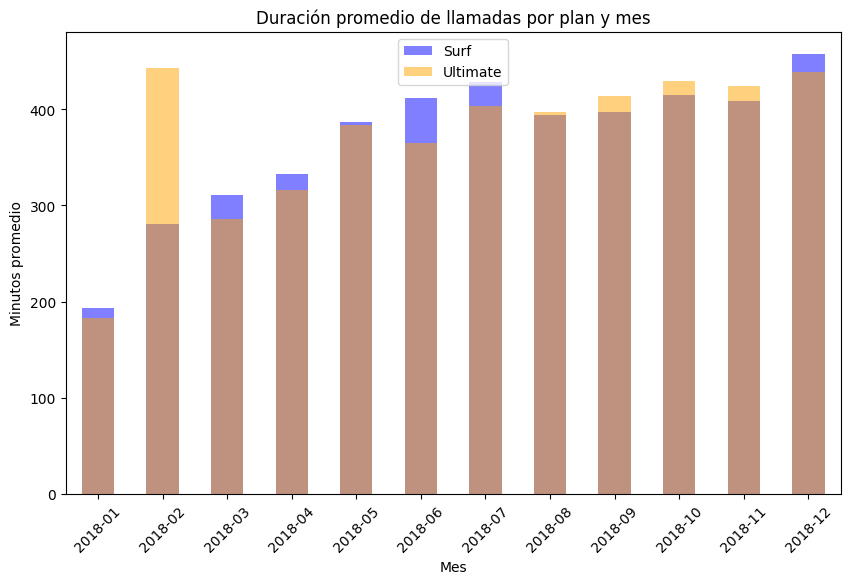

In [29]:
import matplotlib.pyplot as plt

# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
data_plan_month_mean = df.groupby(['plan', 'month'])[['original_total_minutes']].mean().reset_index()

# Filtramos los datos para separar el plan surf y el plan ultimate
data_surf = data_plan_month_mean[data_plan_month_mean['plan'] == 'surf']
data_ultimate = data_plan_month_mean[data_plan_month_mean['plan'] == 'ultimate']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras
data_surf.plot(
    x='month',
    y='original_total_minutes',
    kind='bar',
    color='blue',
    alpha=0.5,
    label='Surf',
    ax=ax
)
data_ultimate.plot(
    x='month',
    y='original_total_minutes',
    kind='bar',
    color='orange',
    alpha=0.5,
    label='Ultimate',
    ax=ax
)
ax.set_xlabel('Mes')
ax.set_ylabel('Minutos promedio')
ax.legend(loc='upper center')
ax.set_title('Duración promedio de llamadas por plan y mes')
plt.xticks(rotation=45)
plt.show()  # Muestra el gráfico

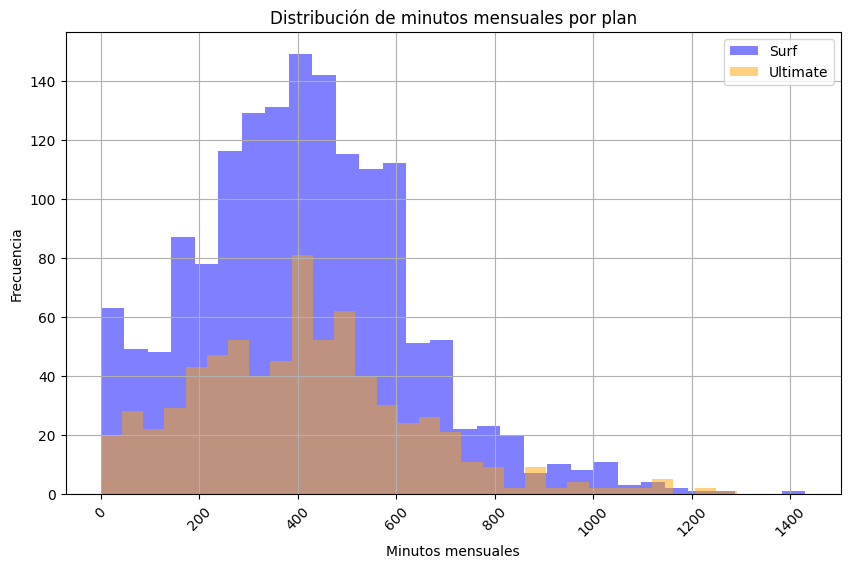

In [30]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Filtramos los datos para separar el plan surf y el plan ultimate
data_surf = df[df['plan'] == 'surf']
data_ultimate = df[df['plan'] == 'ultimate']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
# Histograma para el plan surf
data_surf['original_total_minutes'].hist(
    bins=30,
    alpha=0.5,
    color='blue',
    label='Surf',
    ax=ax
)
# Histograma para el plan ultimate
data_ultimate['original_total_minutes'].hist(
    bins=30,
    alpha=0.5,
    color='orange',
    label='Ultimate',
    ax=ax
)
ax.set_xlabel('Minutos mensuales')
ax.set_ylabel('Frecuencia')
ax.legend(loc='upper right')
plt.title('Distribución de minutos mensuales por plan')
plt.xticks(rotation=45)
plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [31]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Agrupar por plan y mes, y calcular la media y varianza de la duración de llamadas
data_plan_month = df.groupby(['plan', 'month'])[['original_total_minutes']].agg(['mean', 'var']).reset_index()
# Renombrar las columnas para mayor claridad
data_plan_month.columns = ['plan', 'month', 'mean_duration', 'var_duration']
# Imprimir el resultado
data_plan_month



,plan,month,mean_duration,var_duration
0,surf,2018-01,192.840000,14795.440200
1,surf,2018-02,280.851111,46959.219961
2,surf,2018-03,310.970000,31821.317991
3,surf,2018-04,332.380000,45615.666796
4,surf,2018-05,387.108000,50778.127459
5,surf,2018-06,411.450625,39424.054023
6,surf,2018-07,428.060917,53364.540232
7,surf,2018-08,394.474717,46639.240873
8,surf,2018-09,397.133298,39785.302974
9,surf,2018-10,414.435733,44103.681803


C:\Users\pva10\AppData\Local\Temp\ipykernel_25524\2832382197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_surf['plan'] = 'Surf'
C:\Users\pva10\AppData\Local\Temp\ipykernel_25524\2832382197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ultimate['plan'] = 'Ultimate'
C:\Users\pva10\AppData\Local\Temp\ipykernel_25524\2832382197.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

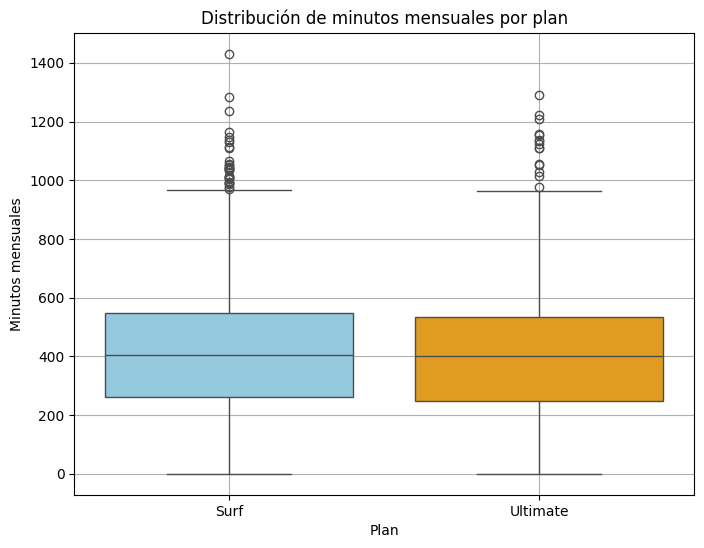

In [32]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Unimos ambos dataframes en uno solo con una columna adicional que indique el plan
data_surf['plan'] = 'Surf'
data_ultimate['plan'] = 'Ultimate'
combined_data = pd.concat([data_surf, data_ultimate])

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_data, x='plan', y='original_total_minutes', palette=['skyblue', 'orange'])
plt.title('Distribución de minutos mensuales por plan')
plt.ylabel('Minutos mensuales')
plt.xlabel('Plan')
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

* Por lor graficos generados se puede observar que existe una pequeña diferencia que muestra que los usuarios del plan ultimate tienden en promedio a realizar llamadas más largas. Mientras que para los ususarios del plan surf se puede observar que la distribución de los datos de los minutos, se encuentran mayormente distribuidos en valores menores a los del otro plan ya que su intervalo intercuartílico esta más hacia abajo. Sin embargo, se puede observar que para sus valores máximos superan en duración de llamadas a los del plan ultimate.

### Mensajes

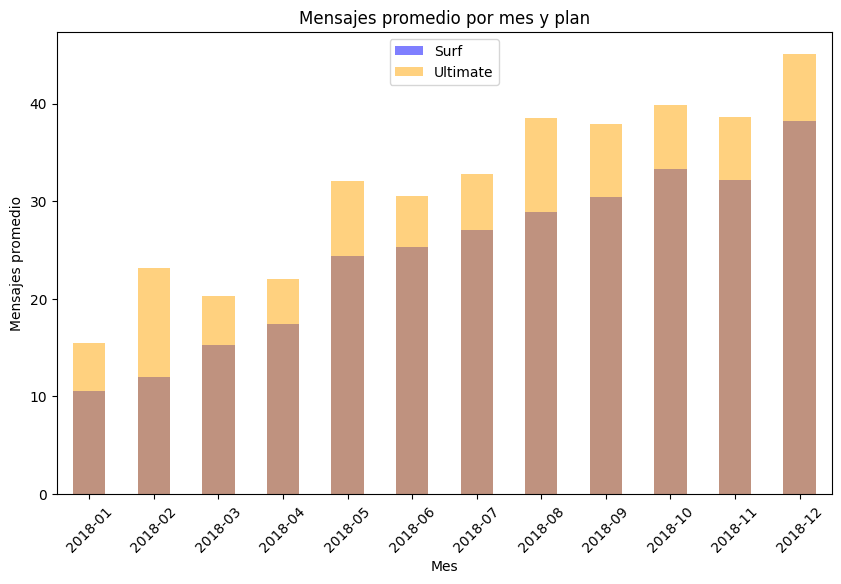

In [33]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Filtramos para separar por numero de mensajes y mes
data_messsages_plan_month = df.groupby(['plan', 'month'])[['numb_messages']].mean().reset_index()
# Filtramos los datos para separar el plan surf y el plan ultimate
data_surf = data_messsages_plan_month[data_messsages_plan_month['plan'] == 'surf']
data_ultimate = data_messsages_plan_month[data_messsages_plan_month['plan'] == 'ultimate']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
# Gráfico de barras
data_surf.plot(
    x='month',
    y='numb_messages',
    kind='bar',
    color='blue',
    alpha=0.5,
    label='Surf',
    ax=ax
)
data_ultimate.plot(
    x='month',
    y='numb_messages',
    kind='bar',
    color='orange',
    alpha=0.5,
    label='Ultimate',
    ax=ax
)
ax.set_xlabel('Mes')
ax.set_ylabel('Mensajes promedio')
plt.title('Mensajes promedio por mes y plan')
ax.legend(loc='upper center')
plt.xticks(rotation=45)
plt.show()  

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Se puede concluir del gráfico anterior una tendencia clara de que el plan ultimate utiliza más mensajes de texto mensualmente que los usuarios del plan surf, ya que no hay ningún mes en en que el plan surf haya superado el uso de mensajes de texto a los usuarios del plan ultimate. 

### Internet

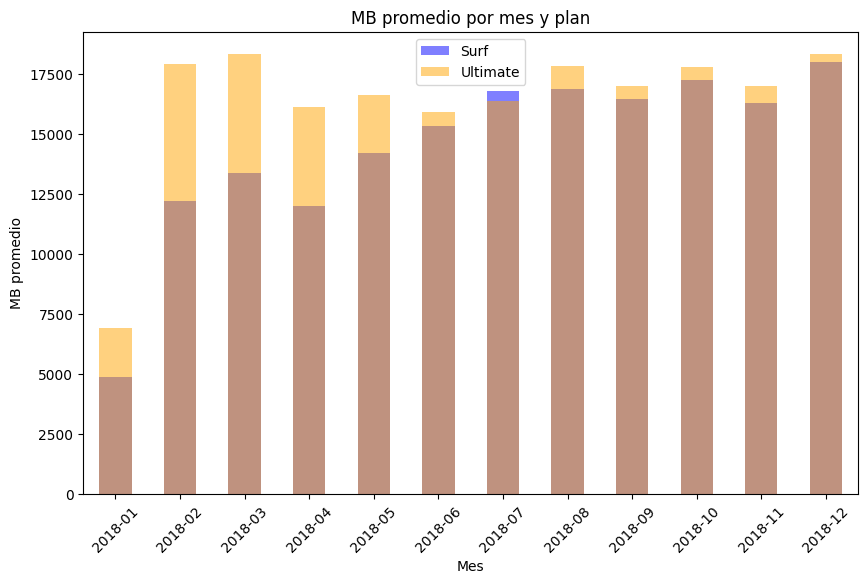

In [34]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Filtramos para separar los datos por mes y plan
data_internet_plan_month = df.groupby(['plan', 'month'])[['mb_used_per_month']].mean().reset_index()
# Filtramos los datos para separar el plan surf y el plan ultimate
data_internet_surf = data_internet_plan_month[data_internet_plan_month['plan'] == 'surf']
data_internet_ultimate = data_internet_plan_month[data_internet_plan_month['plan'] == 'ultimate']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
# Gráfico de barras
data_internet_surf.plot(
    x='month',
    y='mb_used_per_month',
    kind='bar',
    color='blue',
    alpha=0.5,
    label='Surf',
    ax=ax
)
data_internet_ultimate.plot(
    x='month',
    y='mb_used_per_month',
    kind='bar',
    color='orange',
    alpha=0.5,
    label='Ultimate',
    ax=ax
)
ax.set_xlabel('Mes')
ax.set_ylabel('MB promedio')
plt.title('MB promedio por mes y plan')
ax.legend(loc='upper center')
plt.xticks(rotation=45)
plt.show()

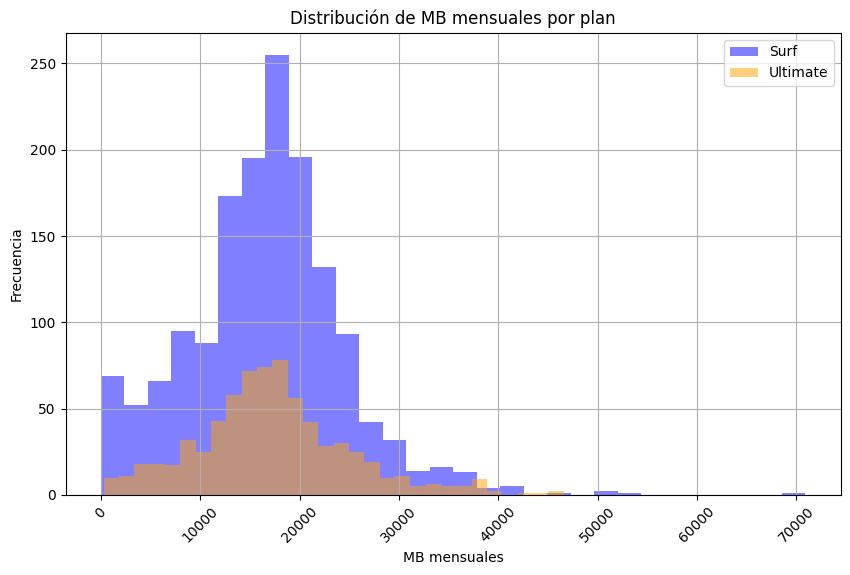

In [35]:
# Compara el trafico en mb mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Filtramos los datos para separar el plan surf y el plan ultimate
data_internet_surf = df[df['plan'] == 'surf']
data_internet_ultimate = df[df['plan'] == 'ultimate']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
# Histograma para el plan surf
data_internet_surf['mb_used_per_month'].hist(
    bins=30,
    alpha=0.5,
    color='blue',
    label='Surf',
    ax=ax
)
# Histograma para el plan ultimate  
data_internet_ultimate['mb_used_per_month'].hist(
    bins=30,
    alpha=0.5,
    color='orange',
    label='Ultimate',
    ax=ax
)
ax.set_xlabel('MB mensuales')
ax.set_ylabel('Frecuencia')
ax.legend(loc='upper right')
plt.title('Distribución de MB mensuales por plan')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Calcula la media y la varianza del trafico mensual de internet.
# Agrupar por plan y mes, y calcular la media y varianza de la duración de llamadas
data_internet_month = df.groupby(['plan', 'month'])[['mb_used_per_month']].agg(['mean', 'var']).reset_index()
# Renombrar las columnas para mayor claridad
data_internet_month.columns = ['plan', 'month', 'mean_traffic', 'var_traffic']
# Imprimir el resultado
data_internet_month

,plan,month,mean_traffic,var_traffic
0,surf,2018-01,4874.860000,1.823995e+07
1,surf,2018-02,12178.843333,4.367296e+07
2,surf,2018-03,13345.440000,6.824556e+07
3,surf,2018-04,11984.203000,5.904494e+07
4,surf,2018-05,14201.487067,6.022968e+07
5,surf,2018-06,15308.450937,4.964589e+07
6,surf,2018-07,16785.430500,6.522972e+07
7,surf,2018-08,16870.108365,7.505225e+07
8,surf,2018-09,16441.597801,4.942480e+07
9,surf,2018-10,17240.074914,6.167954e+07


C:\Users\pva10\AppData\Local\Temp\ipykernel_25524\598523494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_internet_surf['plan'] = 'Surf'
C:\Users\pva10\AppData\Local\Temp\ipykernel_25524\598523494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_internet_ultimate['plan'] = 'Ultimate'
C:\Users\pva10\AppData\Local\Temp\ipykernel_25524\598523494.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

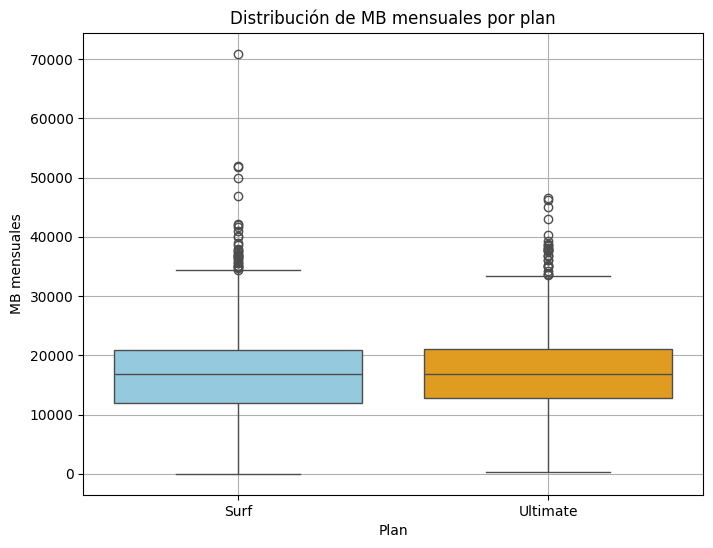

In [37]:
# Traza un diagrama de caja para visualizar la distribución del tráfico mensual de internet
# Unimos ambos dataframes en uno solo con una columna adicional que indique el plan
data_internet_surf['plan'] = 'Surf'
data_internet_ultimate['plan'] = 'Ultimate'
combined_internet_data = pd.concat([data_internet_surf, data_internet_ultimate])

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_internet_data, x='plan', y='mb_used_per_month', palette=['skyblue', 'orange'])
plt.title('Distribución de MB mensuales por plan')
plt.ylabel('MB mensuales')
plt.xlabel('Plan')
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?] 

Si hay diferencia en el trafico de internet gastado entre ambos planes, en la gráfica de barras se puede observar que el plan ultimate tiene usuarios que en promedio usan más MB mensualmente, sin embargo es interesante ver que la diferencia entre el plan surf y plan ultimate no est tanta, podríamos deducir que los del plan surf tienden a pasarse más de sus MB contratados, se puede observar en el histograma como hay más usuarios del plan surf gastando bastantes MB por mes, al igual en el grafico de cajas, se puede observar más valores atipicos en el plan surf, sin embargo sus rangos intercuartilicos son bastante iguales. Esto se puede traducir en mayor ingreso a la empresa del plan surf ya que al pasarse estos usuarios de su plan contratado éstos estarían pagando más al mes por esos MB extras. Ya veremos más adelante cuando se analicen los ingresos en general.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

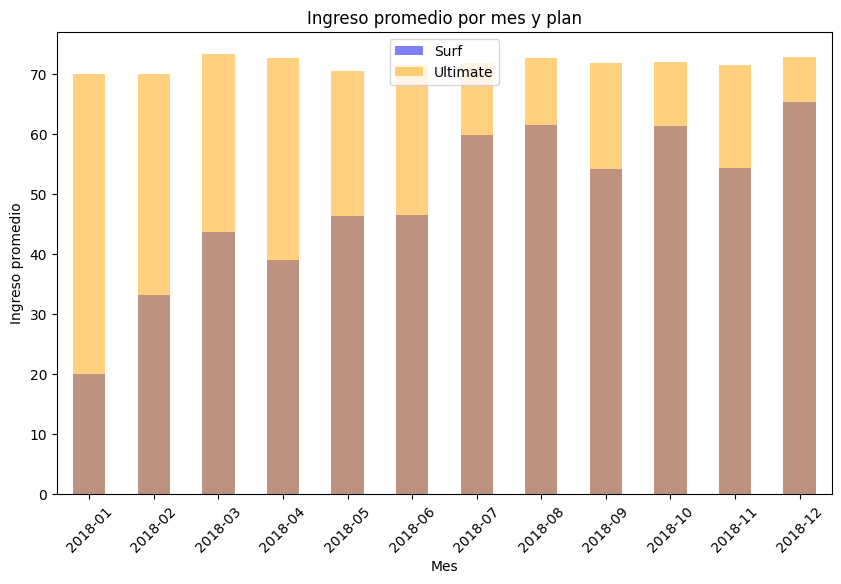

In [38]:
# Comparar el ingreso mensual medio de los usuarios de cada plan por mes
# Agrupar por plan y mes, y calcular la media del ingreso mensual
data_revenue_plan_month = df.groupby(['plan', 'month'])[['monthly_revenue']].mean().reset_index()
# Filtramos los datos para separar el plan surf y el plan ultimate
data_revenue_surf = data_revenue_plan_month[data_revenue_plan_month['plan'] == 'surf']
data_revenue_ultimate = data_revenue_plan_month[data_revenue_plan_month['plan'] == 'ultimate']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
# Gráfico de barras
data_revenue_surf.plot(
    x='month',
    y='monthly_revenue',
    kind='bar',
    color='blue',
    alpha=0.5,
    label='Surf',
    ax=ax
)
data_revenue_ultimate.plot(
    x='month',
    y='monthly_revenue',
    kind='bar',
    color='orange',
    alpha=0.5,
    label='Ultimate',
    ax=ax
)
ax.set_xlabel('Mes')
ax.set_ylabel('Ingreso promedio')
plt.title('Ingreso promedio por mes y plan')
ax.legend(loc='upper center')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Calcula la media y la varianza del del ingreso mensual por plan y mes
# Agrupar por plan y mes, y calcular la media y varianza del ingreso mensual
data_revenue_month = df.groupby(['plan', 'month'])[['monthly_revenue']].agg(['mean', 'var']).reset_index()
# Renombrar las columnas para mayor claridad
data_revenue_month.columns = ['plan', 'month', 'mean_revenue', 'var_revenue']
# Imprimir el resultado
data_revenue_month  

,plan,month,mean_revenue,var_revenue
0,surf,2018-01,20.000000,0.000000
1,surf,2018-02,33.143889,372.546807
2,surf,2018-03,43.729832,1402.700672
3,surf,2018-04,39.033385,1092.947235
4,surf,2018-05,46.425885,1848.173632
5,surf,2018-06,46.539813,1845.797180
6,surf,2018-07,59.855592,2819.669115
7,surf,2018-08,61.465582,3479.674284
8,surf,2018-09,54.141866,1939.383418
9,surf,2018-10,61.363403,2946.123263


C:\Users\pva10\AppData\Local\Temp\ipykernel_25524\3577612767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_revenue_surf['plan'] = 'Surf'
C:\Users\pva10\AppData\Local\Temp\ipykernel_25524\3577612767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_revenue_ultimate['plan'] = 'Ultimate'
C:\Users\pva10\AppData\Local\Temp\ipykernel_25524\3577612767.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and

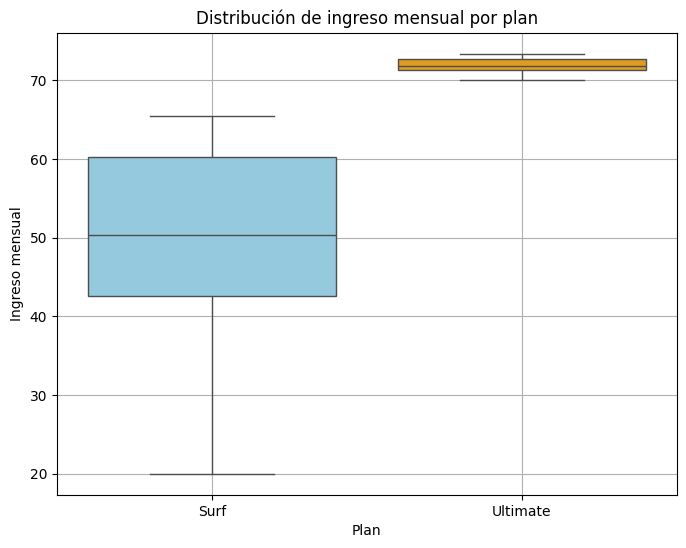

In [40]:
# Traza un diagrama de caja para visualizar la distribución de ingreso mensual
# Unimos ambos dataframes en uno solo con una columna adicional que indique el plan
data_revenue_surf['plan'] = 'Surf'
data_revenue_ultimate['plan'] = 'Ultimate'
combined_revenue_data = pd.concat([data_revenue_surf, data_revenue_ultimate])

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_revenue_data, x='plan', y='monthly_revenue', palette=['skyblue', 'orange'])
plt.title('Distribución de ingreso mensual por plan')
plt.ylabel('Ingreso mensual')
plt.xlabel('Plan')
plt.grid(True)
plt.show()

El ingreso total por el plan surf es: $88192.00
El ingreso total por el plan ultimate es: $51392.49


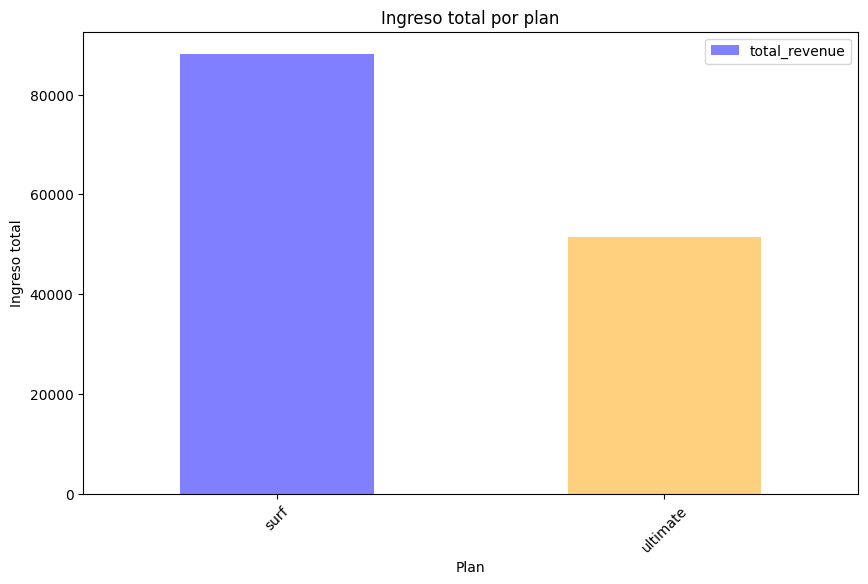

In [41]:
#Calcula el ingreso total de cada plan
# Agrupar por plan y calcular la suma del ingreso mensual
data_revenue_total = df.groupby(['plan'])[['monthly_revenue']].sum().reset_index()
# Renombrar las columnas para mayor claridad
data_revenue_total.columns = ['plan', 'total_revenue']
# Imprimir el resultado 
print(f'El ingreso total por el plan surf es: ${data_revenue_total[data_revenue_total["plan"] == "surf"]["total_revenue"].values[0]:.2f}')
print(f'El ingreso total por el plan ultimate es: ${data_revenue_total[data_revenue_total["plan"] == "ultimate"]["total_revenue"].values[0]:.2f}')
# Traza un gráfico de barras para visualizar el ingreso total por plan
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
# Gráfico de barras
data_revenue_total.plot(
    x='plan',
    y='total_revenue',
    kind='bar',
    color=['blue', 'orange'],
    alpha=0.5,
    ax=ax
)
ax.set_xlabel('Plan')
ax.set_ylabel('Ingreso total')
plt.title('Ingreso total por plan')
plt.legend = False
plt.xticks(rotation=45)
plt.show() 

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Habiendo elaborado la gráficas anteriores se puede observar que el ingreso mensual promedio del plan ultimate tienen se puede observar en el gráfico de de cajas y en la grafica de barras unos valores bastante acotados en torno al costo normal del plan de 70 usd, por el contrario el plan surf es mucho más interesante para la empresa ya que a los usuarios no les es suficiente ese plan y tienden a pagar de más, por ejemplo lo podemos ver en el gráfico de caja y bigotes, su moda ronda los 50 usd siendo el precio usual del plan de 20 usd, claramente no les alcanza ese plan para sus necesidades y tiendesn a pasarse, pero tambien es conveniente decir que si bien su moda es de 50 usd no se acerca al valor del plan ultimate de 70 usd, por lo que a estos usuarios les sigue siendo favorable quedarse en el plan surf y seguir pagando sus excesos.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]


In [50]:
# Prueba las hipótesis
# Hipótesis nula:c Los ingresos mensuales promedio de los usuarios de los planes Surf y Ultimate son iguales.
# Hipótesis alternativa: Los ingresos mensuales promedio de los usuarios de los planes Surf y Ultimate son diferentes.
# Usar la prueba t de Student para comparar las medias de dos grupos independientes
# Filtramos los datos para separar el plan surf y el plan ultimate
data_surf = df[df['plan'] == 'surf']
data_ultimate = df[df['plan'] == 'ultimate']
# Realizamos la prueba t de Student
results= st.ttest_ind(data_surf['monthly_revenue'], data_ultimate['monthly_revenue'], equal_var=False)
# Imprimir los resultados
print(f'Valor p: {results.pvalue:.4f}')
# Interpretar el resultado
if results.pvalue < 0.05:
    print("Rechazamos la hipótesis nula: los ingresos mensuales promedio de los usuarios de los planes Surf y Ultimate son diferentes.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que los ingresos mensuales promedio de los usuarios de los planes Surf y Ultimate son diferentes.")

# La justificación de la prueba t de Student es que los datos son independientes y siguen una distribución normal.
# En este caso, los datos son independientes porque cada usuario tiene un plan diferente y no hay relación entre ellos.


Valor p: 0.0000
Rechazamos la hipótesis nula: los ingresos mensuales promedio de los usuarios de los planes Surf y Ultimate son diferentes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [51]:
# Prueba las hipótesis
# Hipótesis nula: Los ingresos mensuales promedio de los usuarios de la región NY-NJ y el resto de los usuarios son iguales.
# Hipótesis alternativa: Los ingresos mensuales promedio de los usuarios de la región NY-NJ y el resto de los usuarios son diferentes.
# Usar la prueba t de Student para comparar las medias de dos grupos independientes
results_2 = st.ttest_ind(data_ny_nj['monthly_revenue'], data_other['monthly_revenue'], equal_var=False)
# imprimir los resultados
print(f'Valor p: {results_2.pvalue:.4f}')
# Interpretar el resultado
if results_2.pvalue < 0.05:
    print("Rechazamos la hipótesis nula: los ingresos mensuales promedio de los usuarios de la región NY-NJ y el resto de los usuarios son diferentes.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que los ingresos mensuales promedio de los usuarios de la región NY-NJ y el resto de los usuarios son diferentes.")

# La justificación de la prueba t de Student es que los datos son independientes y siguen una distribución normal.
# En este caso, los datos son independientes porque cada usuario tiene un plan diferente y no hay relación entre ellos.


Valor p: 0.0072
Rechazamos la hipótesis nula: los ingresos mensuales promedio de los usuarios de la región NY-NJ y el resto de los usuarios son diferentes.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1. Primero resaltar la importancia de saber que preguntas quieres resolver es lo más importante, en este caso, los problemas ya planteados era para averiguar si existian o no diferencias entre los planes contratados e incluso ver si había diferencia entre ciudades. Lo cual hace que el tratamiento de los datos vaya encaminado a preparar los dataframes adecuados para simplificar el proceso, y cuando lleguemos a las hipotesis tener la certeza de que nuestros dataframes filtrados y mezclados ya están listos para el tratamiento estadístico.

2. La manera que elegí de procesar mis datos fue primero solo realizar lo mínimo necesario para cumplir con los diferentes problemas que se me venian planteando, no fue hasta las pruebas de hipótesis que descubrí que si que sería bueno haber realizado un enriquecimiento de los datos, particularmente para el dataframe de users y filtrar esos datos por la ciudad específica que me preguntaban. No tuve mayor problema en subir y realizar el enriquecimiento de datos necesario para cuando volviera a las pruebas de hipótesis ya solo bastara con citar correctamente los dataframes adecuados y específicos para resolver la problemática. 

### Conclusión general de las pruebas de hipótesis: 

3. En la primera prueba donde se ponía a prueba si la diferencia de los ingresos para los dos diferentes planes era significativa, y como resultado vimos que efectivamente los promedios de ingresos eran diferentes para cada plan, ya lo suponiamos por los resultados provistos por el estudio de ditribución y gráficas que habíamos empleado. Pero la prueba t de Student nos brinda seguridad para afirmar nuestras sospechas, ya que este análisis tiene una mayor complejidad y escrutinio estadístico, podemos afirmar con seguridad lo que ya veníamos sospechando de la clara diferencia entre los ingresos de estos dos planes.

4. La segunda prueba de hipótesis donde se ponía a prueba si había diferencia en el promedio de ingresos procedente de los ususarios de la regío NY-NJ contra el resto de regiones, a diferencia de la prueba pasada aquí venia un poco sin contexto, ya que no se habían hecho analisis previos de ingresos por región por lo que se vuelve un poco dificil predecirlo o sospecharlo antes de haber llegado a este punto, los resultados son claros, estadisticamente se demostró la clara diferencia entre los usuarios de la región NY-NJ y el resto de regiones. 